In [1]:
%matplotlib inline
import pylab as pl
pl.rcParams['figure.figsize'] = (12.0, 9.0)
pl.style.use("ggplot")
import rapt

In [15]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
#import random 
import scipy.integrate as spi
from scipy.integrate import solve_ivp
from scipy import interpolate
from scipy.interpolate import UnivariateSpline
import warnings

In [2]:
from numpy import pi

In [3]:
f = rapt.fields.DoubleDipole()

In [13]:
QMod='/mnt/c/Users/Christopher Crawford/Desktop/StLineModified.txt'#st line modified

In [16]:
T_QS=ConstructAllData(QMod)
T_QS=T_QS.dropna()
T_QS=T_QS.reset_index(drop=True)

In [17]:
T_QS["x"]=T_QS["x"]*100
T_QS["y"]=T_QS["y"]*100
T_QS["z"]=T_QS["z"]*100
T_QS=T_QS.round(4)
T_QS.duplicated().any()
T_QS

,x,y,z,Bx,By,Bz
0,0.01,0.01,50.0,100.0889,-100.0889,-0.0000
1,0.11,0.01,50.0,1102.0235,-100.2514,0.0018
2,0.21,0.01,50.0,2103.6560,-100.1033,0.0089
3,0.31,0.01,50.0,3104.0406,-99.9341,-0.4847
4,0.41,0.01,50.0,4098.7639,-99.6391,0.2926
...,...,...,...,...,...,...
10409627,6.91,-6.91,100.0,-2.0074,2.0074,-0.0000
10409628,6.91,-7.01,100.0,-2.0353,2.0071,0.0003
10409629,7.01,-6.81,100.0,-1.9798,2.0364,-0.0006
10409630,7.01,-6.91,100.0,-2.0077,2.0360,-0.0003


In [19]:
def ObtainB0(x,T):
    T["Del"]=((T["x"]-x[0])**2+(T["y"]-x[1])**2+(T["z"]-x[2])**2)**0.5
    b=T["Del"].idxmin()
    a=T["Del"].min()
    if a>1.1:
        print("Not working as expected in Quad /SIM ")
    B_Q=[T.iloc[b]["Bx"],T.iloc[b]["By"],T.iloc[b]["Bz"]]
    return B_Q

In [20]:
BQ=ObtainB0(x,T_QS)

NameError: name 'x' is not defined

In [12]:
def ConstructAllData(T):
    p=pd.read_csv(T,delim_whitespace=True)
    df           = pd.DataFrame(p)
    df_OtherHalf = df.rename(columns={'x': 'y','y': 'x'})
    df_1stq=df.append(df_OtherHalf)
    df_2ndq=df_1stq.copy()
    df_2ndq.x=df_2ndq.x*-1
    df_3rdq=df_2ndq.copy()
    df_3rdq.y=df_3rdq.y*-1
    df_4thq=df_1stq.copy()
    df_4thq.y=df_4thq.y*-1
    df_Final=pd.concat([df_1stq, df_2ndq, df_3rdq,df_4thq],ignore_index=True)
    df_Final
    return df_Final

In [11]:
def CombineB0(x,T_Quad,T_SIM,T_Ring):
    BQ=ObtainB0(x,T_Quad)
    BS=ObtainB0(x,T_SIM)
    BR=ObtainB0_Ring(x,T_Ring)
    BT=[BQ[0]+BS[0]+BR[0],BQ[1]+BS[1]+BR[1],BQ[2]+BS[2]+BR[2]]
    test=[BQ[0]+BR[0],BQ[1]+BR[1],BQ[2]+BR[2]]
    #return BT
    return test

In [4]:
g = rapt.GuidingCenter(pos=(0, -10*rapt.Re,0),
                       v = rapt.utils.speedfromKE(1e5, rapt.m_el),  # electron kinetic energy 100keV
                       pa = 80,
                       mass = rapt.m_el,
                       charge = -rapt.e,
                       field = f)

In [5]:
g.advance(200)

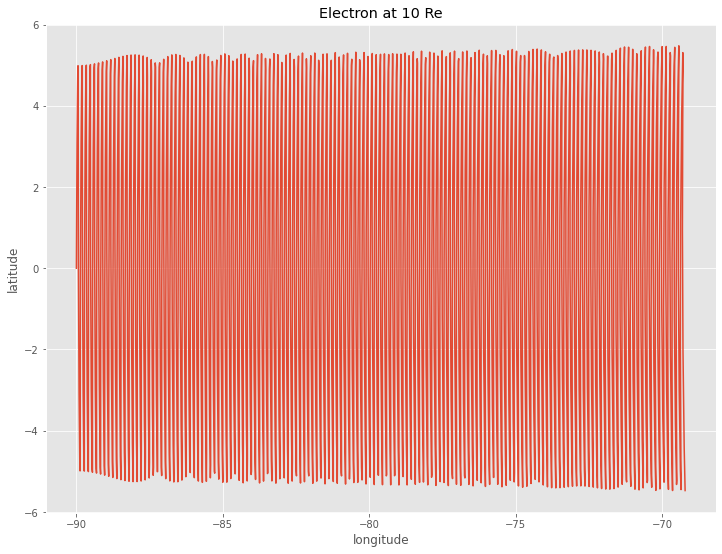

In [6]:
pl.plot(g.gettheta()/pi*180, 90-g.getphi()/pi*180)
pl.xlabel("longitude")
pl.ylabel("latitude")
pl.title("Electron at 10 Re");

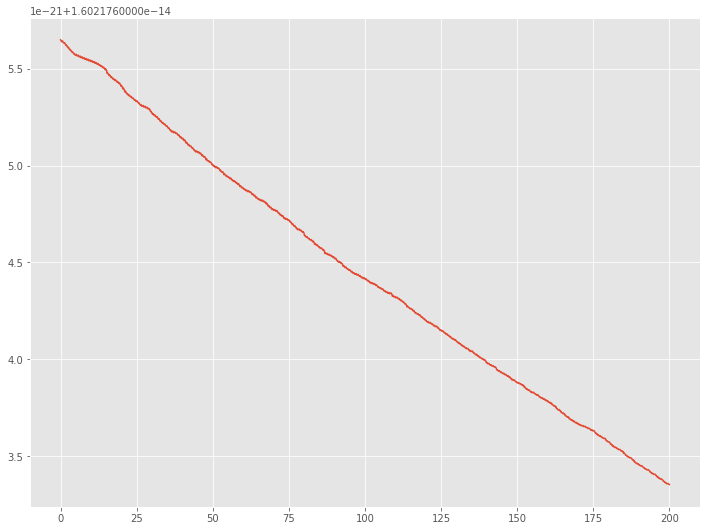

In [7]:
pl.plot(g.gett(), g.getke())

Next example of particle guiding

In [8]:
g = rapt.GuidingCenter(pos=(0, -10*rapt.Re,0),
                       v = rapt.utils.speedfromKE(1e6, rapt.m_el),
                       pa = 80,
                       mass = rapt.m_el,
                       charge = -rapt.e,
                       field = f)
p = rapt.Particle()   # create the Particle object without specifying any parameters
p.init(g)             # Initialize the Particle object using the existing GuidingCenter object

In [9]:
g.advance(10)
p.advance(10)

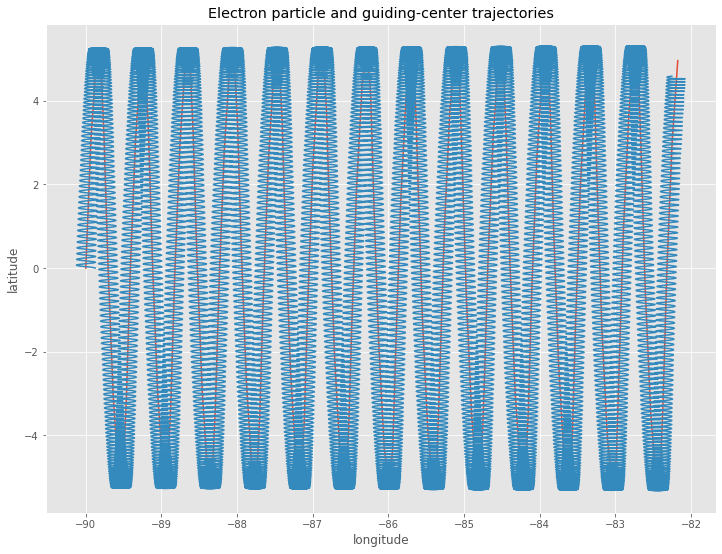

In [10]:
pl.plot(g.gettheta()/pi*180, 90-g.getphi()/pi*180)
pl.plot(p.gettheta()/pi*180, 90-p.getphi()/pi*180)
pl.xlabel("longitude")
pl.ylabel("latitude")
pl.title("Electron particle and guiding-center trajectories");